# Subsetting the dataset into Test and Train

In [139]:
if(!require(DBI)){install.packages("DBI"); require(DBI)}
if(!require(RSQLite)){install.packages("RSQLite"); require(RSQLite)}
library(dplyr)
library(stringr)

In [140]:
DATA_PATH = "C:/Users/moshe/Documents/projectML/p1/data/raw/"
DB_FILE = paste0(DATA_PATH,"/hairsalon.db") 
#### Read function to import data from the SQL to a  dataframe.
readSQL <- function(query, db=DB_FILE) {
    require(DBI)
    require(RSQLite)
    con <- dbConnect(SQLite(), DB_FILE)
    df <- dbGetQuery(con, query)
    return(df)
}

In [185]:
filepath <- "C:/Users/moshe/Documents/projectML/p1/data/interim/selectedfeatures.csv"
l <- read.csv(file=filepath,header = T)
l <- paste(l[['Variable']],collapse = "\",\"")
l <-paste("\"noshowflag",l,sep="\",\"",collapse="")
selectedfeatures <- paste(l,"\"",sep="")
selectedfeatures

[1] "\"noshowflag\",\"firstapp\",\"multipleappt\",\"previousnoshow\",\"svcavg\",\"lastsvcavg\",\"x0_wkday_1.0_hour_10.0\",\"x0_wkday_1.0_hour_11.0\",\"x0_wkday_1.0_hour_8.0\",\"x0_wkday_3.0_hour_14.0\",\"x0_wkday_4.0_hour_10.0\",\"x0_wkday_4.0_hour_9.0\",\"x0_wkday_5.0_hour_14.0\",\"x1_COLOR\",\"x1_STYLE\",\"x2_CBAL\",\"x2_CDPB\",\"x2_CON\",\"x2_FRI\",\"x2_SBD\",\"x2_SHCW\",\"x3_BECKY\",\"x3_KELLY\",\"x3_SINEAD\",\"x4_JJ\",\"x5_lastappt31-45\",\"x7_last60dlatecancel-1\",\"x8_last60regcancel-0\",\"x9_10.0\",\"x9_12.0\",\"x9_17.0\",\"x10_5.0\",\"x10_6.0\",\"x11_2.0\",\"x11_3.0\",\"x13_1.0\",\"x13_5.0\",\"last60dbillamt01\",\"last60dcolor01\",\"last60dproduct01\""

In [186]:
query <-  paste('SELECT ',selectedfeatures,' FROM finalbooking')
query

data = readSQL(query)
head(data)
#typeof(data)

[1] "SELECT  \"noshowflag\",\"firstapp\",\"multipleappt\",\"previousnoshow\",\"svcavg\",\"lastsvcavg\",\"x0_wkday_1.0_hour_10.0\",\"x0_wkday_1.0_hour_11.0\",\"x0_wkday_1.0_hour_8.0\",\"x0_wkday_3.0_hour_14.0\",\"x0_wkday_4.0_hour_10.0\",\"x0_wkday_4.0_hour_9.0\",\"x0_wkday_5.0_hour_14.0\",\"x1_COLOR\",\"x1_STYLE\",\"x2_CBAL\",\"x2_CDPB\",\"x2_CON\",\"x2_FRI\",\"x2_SBD\",\"x2_SHCW\",\"x3_BECKY\",\"x3_KELLY\",\"x3_SINEAD\",\"x4_JJ\",\"x5_lastappt31-45\",\"x7_last60dlatecancel-1\",\"x8_last60regcancel-0\",\"x9_10.0\",\"x9_12.0\",\"x9_17.0\",\"x10_5.0\",\"x10_6.0\",\"x11_2.0\",\"x11_3.0\",\"x13_1.0\",\"x13_5.0\",\"last60dbillamt01\",\"last60dcolor01\",\"last60dproduct01\"  FROM finalbooking"

noshowflag,firstapp,multipleappt,previousnoshow,svcavg,lastsvcavg,x0_wkday_1.0_hour_10.0,x0_wkday_1.0_hour_11.0,x0_wkday_1.0_hour_8.0,x0_wkday_3.0_hour_14.0,...,x9_17.0,x10_5.0,x10_6.0,x11_2.0,x11_3.0,x13_1.0,x13_5.0,last60dbillamt01,last60dcolor01,last60dproduct01
1,1,0,0,-19.02128,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,44.71925,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1,0,0,77.45883,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
0,1,0,0,77.45883,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1,0,0,44.71925,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1,1,0,44.71925,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
cols.to.factor <- sapply( data, function(col) length(unique(col)) < 10 )
data[ cols.to.factor] <- lapply(data[ cols.to.factor] , factor) 
typeof(data)
names(data)

[1] "list"

[1] "noshowflag"             "firstapp"               "multipleappt"          
 [4] "previousnoshow"         "svcavg"                 "lastsvcavg"            
 [7] "x0_wkday_1.0_hour_10.0" "x0_wkday_1.0_hour_11.0" "x0_wkday_1.0_hour_8.0" 
[10] "x0_wkday_3.0_hour_14.0" "x0_wkday_4.0_hour_10.0" "x0_wkday_4.0_hour_9.0" 
[13] "x0_wkday_5.0_hour_14.0" "x1_COLOR"               "x1_STYLE"              
[16] "x2_CBAL"                "x2_CDPB"                "x2_CON"                
[19] "x2_FRI"                 "x2_SBD"                 "x2_SHCW"               
[22] "x3_BECKY"               "x3_KELLY"               "x3_SINEAD"             
[25] "x4_JJ"                  "x5_lastappt31-45"       "x7_last60dlatecancel-1"
[28] "x8_last60regcancel-0"   "x9_10.0"                "x9_12.0"               
[31] "x9_17.0"                "x10_5.0"                "x10_6.0"               
[34] "x11_2.0"                "x11_3.0"                "x13_1.0"               
[37] "x13_5.0"                "last60dbillamt01"       "last60dcolor01"        
[40] "last60dproduct01"

In [190]:
#data <- data %>% rename_at(vars(starts_with("x0_wkday-")), funs(str_replace(., " ", "_")))
#data <- data %>% rename_at(vars(starts_with("x0_wkday")), funs(str_replace(., "-", "_")))

#colnames(data)

In [191]:
summary(data)

 noshowflag firstapp multipleappt previousnoshow     svcavg      
 0:1655     0:876    0:1360       0:1619         Min.   :-43.12  
 1: 138     1:917    1: 433       1: 174         1st Qu.: 44.72  
                                                 Median : 63.01  
                                                 Mean   : 65.45  
                                                 3rd Qu.: 77.46  
                                                 Max.   :270.00  
   lastsvcavg     x0_wkday_1.0_hour_10.0 x0_wkday_1.0_hour_11.0
 Min.   :-19.02   0:1737                 0:1761                
 1st Qu.:  0.00   1:  56                 1:  32                
 Median :  0.00                                                
 Mean   : 30.38                                                
 3rd Qu.: 44.72                                                
 Max.   :244.47                                                
 x0_wkday_1.0_hour_8.0 x0_wkday_3.0_hour_14.0 x0_wkday_4.0_hour_10.0
 0:1786              

In [86]:
if(!require(tableone)){install.packages("tableone");require(tableone)}

In [87]:
vn <- setdiff(names(data),"noshowflag")

CreateTableOne(data = data,vars = vn,includeNA = T)

                                
                                 Overall      
  n                               1793        
  firstapp = 1 (%)                 917 (51.1) 
  existingcustomer = 1 (%)         844 (47.1) 
  multipleappt = 1 (%)             433 (24.1) 
  previousnoshow = 1 (%)           174 ( 9.7) 
  last90dproductbuyer = 1 (%)      101 ( 5.6) 
  activebundlepromo = 1 (%)         63 ( 3.5) 
  svcavg (mean (SD))             65.45 (36.71)
  lastsvcavg (mean (SD))         30.38 (40.67)
  x0_wkday_1.0_hour_10.0 = 1 (%)    56 ( 3.1) 
  x0_wkday_1.0_hour_11.0 = 1 (%)    32 ( 1.8) 
  x0_wkday_1.0_hour_12.0 = 1 (%)    28 ( 1.6) 
  x0_wkday_1.0_hour_13.0 = 1 (%)    37 ( 2.1) 
  x0_wkday_1.0_hour_14.0 = 1 (%)    30 ( 1.7) 
  x0_wkday_1.0_hour_15.0 = 1 (%)    29 ( 1.6) 
  x0_wkday_1.0_hour_16.0 = 1 (%)    41 ( 2.3) 
  x0_wkday_1.0_hour_17.0 = 1 (%)    41 ( 2.3) 
  x0_wkday_1.0_hour_18.0 = 1 (%)    38 ( 2.1) 
  x0_wkday_1.0_hour_19.0 = 1 (%)    14 ( 0.8) 
  x0_wkday_1.0_hour_8.0 = 1

In [88]:
#library(devtools)
#install_github("karpatit/mechkar")
if(!require(mechkar)){install.packages("mechkar"); require(mechkar)}

In [89]:
Table1(data = data,x = vn,y = "noshowflag")

  |======================================================================| 100%

Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()


V1,V2,Pop,0,1,pval
Individuals,n,1793,1655,138,NA
firstapp,1,917 (51.1%),853 (51.5%),64 (46.4%),0.281
existingcustomer,1,844 (47.1%),780 (47.1%),64 (46.4%),0.935
multipleappt,1,433 (24.1%),431 (26.0%),2 (1.4%),0
previousnoshow,1,174 (9.7%),150 (9.1%),24 (17.4%),0.002
last90dproductbuyer,1,101 (5.6%),94 (5.7%),7 (5.1%),0.916
activebundlepromo,1,63 (3.5%),62 (3.7%),1 (0.7%),0.064
svcavg,Mean (SD),65.4 (36.7),66.7 (34.7),50.5 (53.4),NA
svcavg,Median (IQR),63.0 (44.7-77.5),70.2 (44.7-77.5),44.7 (21.9-77.5),0.001
lastsvcavg,Mean (SD),30.4 (40.7),30.3 (40.5),30.8 (42.6),NA


In [90]:
############### TRAIN_TEST #######################
train_test <- function(data=NULL,train_name=NULL,test_name=NULL,prop=NULL,seed=123,tableone=False)
{
  checkTrainTest <- function(train=NULL,test=NULL) {
     train[["traintest_ind_"]] <- 1
     test[["traintest_ind_"]] <- 2
     data <- rbind(train, test)
     tab <- Table1(data=data, y="traintest_ind_",x=names(train),messages = F)
     vars <- subset(tab, pval < 0.05)$V1
     if (length(vars)==1) {
        message("You got a perfectly balanced training and test datasets")
        message(" ")
     } else {
        message("WARNING: The following variables are not balanced between the training and test datasets:")
       for (v in vars) { message(paste("*",v)) }
          message("You can try to change the seed value until you get a balanced partition.")
          message("Alternatively, you can ommit this warning and exclude those variables from your model")
          message(" ")
       }
       return(tab)
  }
  ## set the seed to make your partition reproductible
  set.seed(seed)
  smp_size <- floor(prop * nrow(data))
  train_ind <- sample(seq_len(nrow(data)), size = smp_size)
  assign(train_name, data[train_ind, ], envir=globalenv())
  assign(test_name, data[-train_ind, ], envir=globalenv())
  tab = checkTrainTest(get(train_name),get(test_name))
  message(paste("Dataset partitioned into:"))
  message(paste(" + Train dataset:", train_name))
  message(paste(" + Test dataset:", test_name))
  if(tableone==TRUE) {
     return(tab)
  } 
}

## Test dataset

In [91]:
tab1 <- train_test(data = data, train_name = "temp", test_name = "test",prop = 0.80, seed = 100, tableone=T)

  |======================================================================| 100%

Coefficient covariances computed by hccm()
Coefficient covariances computed by hccm()
* lastsvcavg
* x0_wkday_1.0_hour_17.0
* x0_wkday_4.0_hour_19.0
* x2_CHLHHC
* x9_14.0
* x10_1.0
* x11_5.0
* traintest_ind_
You can try to change the seed value until you get a balanced partition.
Alternatively, you can ommit this warning and exclude those variables from your model
 
Dataset partitioned into:
 + Train dataset: temp
 + Test dataset: test


In [92]:
dim(temp)
dim(test)

[1] 1434  178

[1] 359 178

In [93]:
table(data$noshowflag)


   0    1 
1655  138 

In [94]:
l <-"firstapp+existingcustomer+multipleappt+previousnoshow+last90dproductbuyer+activebundlepromo"
data_balanced_over <- ovun.sample(noshowflag ~ ., data = data, method = "over",N = 300)$data
table(data_balanced_over$noshowflag)

ERROR: Error in parse(text = x, keep.source = FALSE): <text>:1:1893: unexpected numeric constant
1: +x1_MISC+x1_STYLE+x2_CAL+x2_CALC+x2_CAS+x2_CBAL+x2_CCAMO+x2_CCO+x2_CDPB+x2_CFC+x2_CHLFH+x2_CHLFHC+x2_CHLHH+x2_CHLHHC+x2_CHLPHC+x2_CHLPL+x2_CMT+x2_CON+x2_CT+x2_CTU+x2_FRI+x2_MISC+x2_SBD+x2_SBD5
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        


In [34]:
tab1

V1,V2,Pop,1,2,pval
Individuals,n,537577,430061,107516,NA
User_ID,Mean (SD),"1,002,991.8 (1,714.4)","1,002,990.5 (1,713.9)","1,002,997.4 (1,716.2)",NA
User_ID,Median (IQR),"1,003,031.0 (1,001,495.0-1,004,417.0)","1,003,031.0 (1,001,494.0-1,004,415.0)","1,003,035.0 (1,001,496.0-1,004,425.0)",0.238
Product_ID,P00000142,"1,130 (0.2%)",919 (0.2%),211 (0.2%),NA
Product_ID,P00000242,371 (0.1%),298 (0.1%),73 (0.1%),0.238
Product_ID,P00000342,238 (0.0%),193 (0.0%),45 (0.0%),NA
Product_ID,P00000442,92 (0.0%),79 (0.0%),13 (0.0%),NA
Product_ID,P00000542,146 (0.0%),114 (0.0%),32 (0.0%),NA
Product_ID,P00000642,512 (0.1%),419 (0.1%),93 (0.1%),NA
Product_ID,P00000742,238 (0.0%),192 (0.0%),46 (0.0%),NA


## Train and Dev

In [35]:
tab2 <- train_test(data = temp, train_name = "train", test_name = "dev",prop = 0.8, seed = 123, tableone=T)

  |======================================================================| 100%

You got a perfectly balanced training and test datasets
 
Dataset partitioned into:
 + Train dataset: train
 + Test dataset: dev


In [36]:
dim(train)
dim(dev)

[1] 344048     12

[1] 86013    12

In [37]:
tab2

V1,V2,Pop,1,2,pval
Individuals,n,430061,344048,86013,NA
User_ID,Mean (SD),"1,002,990.5 (1,713.9)","1,002,991.4 (1,714.1)","1,002,986.6 (1,713.4)",NA
User_ID,Median (IQR),"1,003,031.0 (1,001,494.0-1,004,415.0)","1,003,031.0 (1,001,496.0-1,004,416.0)","1,003,024.0 (1,001,484.0-1,004,411.0)",0.464
Product_ID,P00000142,919 (0.2%),719 (0.2%),200 (0.2%),NA
Product_ID,P00000242,298 (0.1%),228 (0.1%),70 (0.1%),0.464
Product_ID,P00000342,193 (0.0%),157 (0.0%),36 (0.0%),NA
Product_ID,P00000442,79 (0.0%),63 (0.0%),16 (0.0%),NA
Product_ID,P00000542,114 (0.0%),91 (0.0%),23 (0.0%),NA
Product_ID,P00000642,419 (0.1%),339 (0.1%),80 (0.1%),NA
Product_ID,P00000742,192 (0.0%),157 (0.0%),35 (0.0%),NA


In [39]:
### save memeory, remove the datasets that will not be used more...
rm(temp,data)

Checking the distribution of the outcome on the three subsets

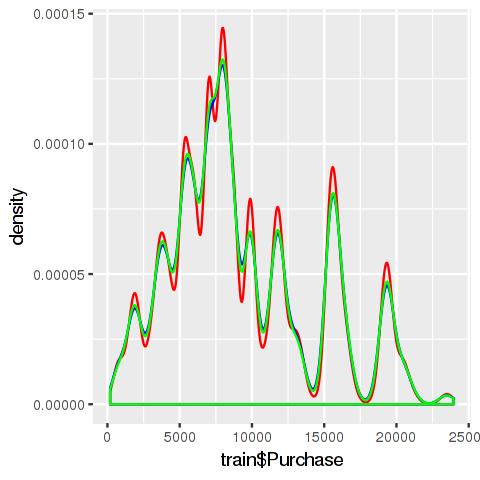

In [43]:
require(ggplot2)

options(repr.plot.width = 4, repr.plot.height = 4)

ggplot() +
    geom_density(aes(x=train$Purchase),color="red",alpha=0.3) +
    geom_density(aes(x=dev$Purchase),color="blue",alpha=0.3) +
    geom_density(aes(x=test$Purchase),color="green",alpha=0.3)


# Dataset Inbalance

In [39]:
if(!require(imbalance)){install.packages("imbalance");require(imbalance)}
### ROSE = Random Over-Sampling Examples
if(!require(ROSE)){install.packages("ROSE");require(ROSE)}


Loading required package: imbalance
Installing package into 'C:/Users/moshe/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependencies 'dbscan', 'bnlearn', 'KernelKnn', 'smotefamily'



package 'dbscan' successfully unpacked and MD5 sums checked
package 'bnlearn' successfully unpacked and MD5 sums checked
package 'KernelKnn' successfully unpacked and MD5 sums checked
package 'smotefamily' successfully unpacked and MD5 sums checked
package 'imbalance' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\moshe\AppData\Local\Temp\RtmpC04rg5\downloaded_packages


Loading required package: imbalance


In [47]:
data(newthyroid1)
head(newthyroid1)

T3resin,Thyroxin,Triiodothyronine,Thyroidstimulating,TSH_value,Class
105,7.3,1.5,1.5,-0.1,negative
67,23.3,7.4,1.8,-0.6,positive
111,8.4,1.5,0.8,1.2,negative
89,14.3,4.1,0.5,0.2,positive
105,9.5,1.8,1.6,3.6,negative
110,20.3,3.7,0.6,0.2,positive


In [52]:
table(newthyroid1$Class)
table(newthyroid1$Class)/nrow(newthyroid1)*100


negative positive 
     180       35 


negative positive 
83.72093 16.27907 

In [68]:
numPositive <- length(which(newthyroid1$Class == "positive"))
numNegative <- length(which(newthyroid1$Class == "negative"))
nInstances <- numNegative - numPositive
cbind(numPositive=numPositive,numNegative=numNegative,nInstances=nInstances)

numPositive,numNegative,nInstances
35,180,145


In [56]:
#under sampling
data_balanced_under <- ovun.sample(Class ~ ., data = newthyroid1, method = "under",N = numPositive*2)$data
table(data_balanced_under$Class)


negative positive 
      35       35 

In [57]:
#over sampling
data_balanced_over <- ovun.sample(Class ~ ., data = newthyroid1, method = "over",N = numNegative*2)$data
table(data_balanced_over$Class)


negative positive 
     180      180 

In [69]:
#over_under sampling
data_balanced_both <- ovun.sample(Class ~ ., data = newthyroid1, method = "both", p=0.5,N = 180, seed = 1)$data
table(data_balanced_both$Class)


negative positive 
      90       90 

In [59]:
# Rose: 
data.rose <- ROSE(Class ~ ., data = newthyroid1, seed = 1)$data
table(data.rose$Class)


negative positive 
     105      110 

#### Oversampling with Synthetic data

In [66]:

newSamples <- pdfos(dataset = newthyroid1, numInstances = nInstances,classAttr = "Class")
newDataset <- rbind(newthyroid1, newSamples)
table(newDataset$Class)


negative positive 
     180      180 